In [58]:
import time
import math
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 

client_id = "0492f7abffc041aca3b7f3760e01aa9a"
client_secret = "a53ce2d400544d359e99406d8605f3b6"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

### Get tracks

In [59]:
#Get track ids
def show_tracks(results, uriArray):
    for i, item in enumerate(results['items']):
        track = item['track']
        uriArray.append(track['id'])
        
#Spotify provides songs in a paginated format of 100 songs, so to gather more than 100 songs, the while loop is crucial
def get_playlist_track_id(username, playlist_id):
    trackID = []
    results = sp.user_playlist(username, playlist_id)
    tracks = results['tracks']
    show_tracks(tracks, trackID)
    while tracks['next']:
        tracks = sp.next(tracks)
        show_tracks(tracks, trackID)
    return trackID

tracks_chill = get_playlist_track_id('mgbreslau', 'spotify:playlist:6p9Mq1s3tih0wYMAmOeHkf')
tracks_rap = get_playlist_track_id('mgbreslau', 'spotify:playlist:37i9dQZF1DX0XUsuxWHRQd')
tracks_hOut = get_playlist_track_id('mgbreslau', 'spotify:playlist:2juSs4Mwf7BVCsEPV2IFKF')
tracks_classical = get_playlist_track_id('mgbreslau', 'spotify:playlist:0PdXimcoajis9im3jBY6ig')

In [60]:
print("Chill: ", len(tracks_chill))
print("Rap: ", len(tracks_rap))
print("Hang Out: ", len(tracks_hOut))
print("Classical: ", len(tracks_classical))

Chill:  62
Rap:  50
Hang Out:  148
Classical:  40


In [61]:
def getTrackFeatures(id):
    track_details = sp.track(id)
    track_features = sp.audio_features(id)
    
    #details
    name = track_details['name']
    album = track_details['album']['name']
    artist = track_details['album']['artists'][0]['name']
    release_date = track_details['album']['release_date']
    length = track_details['duration_ms']
    popularity = track_details['popularity']
    
    #features
    acousticness = track_features[0]['acousticness']
    danceability = track_features[0]['danceability']
    energy = track_features[0]['energy']
    instrumentalness = track_features[0]['instrumentalness']
    liveness = track_features[0]['liveness']
    loudness = track_features[0]['loudness']
    speechiness = track_features[0]['speechiness']
    tempo = track_features[0]['tempo']
    time_signature = track_features[0]['time_signature']
    
    track = [name, album, artist, release_date, length, popularity, danceability, 
             acousticness, energy, instrumentalness, liveness, 
             loudness, speechiness, tempo, time_signature]
    return track

In [62]:
def get_songs(tracks):
    songs = []
    for i in range(len(tracks)):
        time.sleep(.5)
        track = getTrackFeatures(tracks[i])
        songs.append(track)
    return songs

songs_chill = get_songs(tracks_chill)
songs_rap = get_songs(tracks_rap)
songs_hOut = get_songs(tracks_hOut)
songs_classical = get_songs(tracks_classical)

In [63]:
df_chill = pd.DataFrame(songs_chill, columns = ["Name", "Album", "Artist", "Release_date", "Length", "Popularity", "Danceability", 
                                                "Acousticness", "Energy", "Instrumentalness", "Liveness", 
                                                "Loudness", "Speechiness", "Tempo", "Time_signature"])
df_chill.head(3)

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,Fly Me To The Moon (In Other Words),Sinatra/Basie: The Complete Reprise Studio Rec...,Frank Sinatra,1962-12-10,147000,73,0.668,0.453,0.260,0.0000,0.0621,-14.256,0.0523,119.416,4
1,At Last,At Last!,Etta James,1960,179693,75,0.274,0.547,0.348,0.0133,0.3340,-8.631,0.0293,87.430,3
2,In A Sentimental Mood,Duke Ellington & John Coltrane,Duke Ellington,1963-02,255226,66,0.464,0.936,0.305,0.0846,0.2080,-12.435,0.0316,108.229,4


In [64]:
df_rap = pd.DataFrame(songs_rap, columns = ["Name", "Album", "Artist", "Release_date", "Length", "Popularity", "Danceability", 
                                            "Acousticness", "Energy", "Instrumentalness", "Liveness", 
                                            "Loudness", "Speechiness", "Tempo", "Time_signature"])
df_rap.head(3)

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,Drankin N Smokin,Pluto x Baby Pluto,Future,2020-11-13,213520,82,0.752,0.04210,0.658,0.0,0.0927,-6.297,0.342,151.951,4
1,Tyler Herro,Tyler Herro,Jack Harlow,2020-10-22,156497,84,0.794,0.11000,0.756,0.0,0.2470,-7.160,0.136,123.066,4
2,On Me,On Me,Lil Baby,2020-12-04,135959,82,0.856,0.00327,0.564,0.0,0.1340,-6.295,0.392,77.972,4


In [65]:
df_hOut = pd.DataFrame(songs_hOut, columns = ["Name", "Album", "Artist", "Release_date", "Length", "Popularity", "Danceability", 
                                              "Acousticness", "Energy", "Instrumentalness", "Liveness", 
                                              "Loudness", "Speechiness", "Tempo", "Time_signature"])
df_hOut.head(3)

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,Girls Like You (feat. Cardi B),Girls Like You (feat. Cardi B),Maroon 5,2018-05-30,235545,74,0.851,0.568,0.541,0.0,0.1300,-6.825,0.0505,124.959,4
1,Jackie Chan,Jackie Chan,Tiësto,2018-05-18,215759,74,0.747,0.374,0.834,0.0,0.0586,-2.867,0.0450,128.005,4
2,40 Day Dream,Up from Below,Edward Sharpe & The Magnetic Zeros,2009-07-14,233586,46,0.573,0.228,0.656,0.0,0.0651,-5.954,0.0562,81.952,4


In [66]:
df_classical = pd.DataFrame(songs_classical, columns = ["Name", "Album", "Artist", "Release_date", "Length", "Popularity", "Danceability", 
                                                        "Acousticness", "Energy", "Instrumentalness", "Liveness", 
                                                        "Loudness", "Speechiness", "Tempo", "Time_signature"])
df_classical.head(3)

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Bach: Unaccompanied Cello Suites (Remastered),Johann Sebastian Bach,1983,151480,64,0.257,0.900,0.109,0.867,0.0762,-21.356,0.0597,75.020,4
1,"Horn Concerto No.4 in E flat, K.495: 3. Rondo ...",Mozart in the Morning,Wolfgang Amadeus Mozart,1992-09-15,217000,20,0.360,0.994,0.172,0.919,0.1200,-20.092,0.0464,63.296,4
2,"Köln, January 24, 1975, Pt. II C - Live",The Köln Concert,Keith Jarrett,1975-11-30,416840,40,0.270,0.973,0.688,0.884,0.6690,-16.305,0.0547,75.845,4


# Histograms of the features

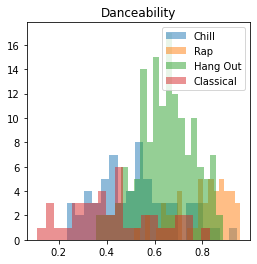

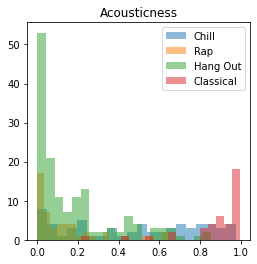

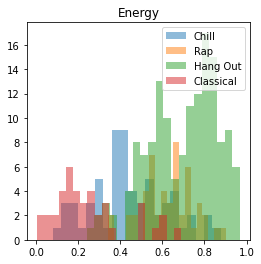

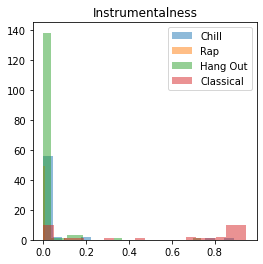

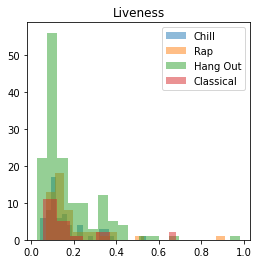

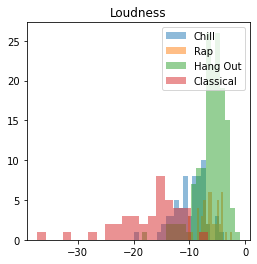

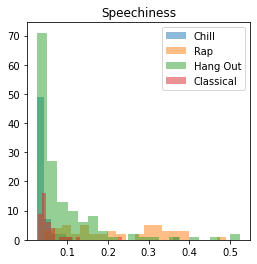

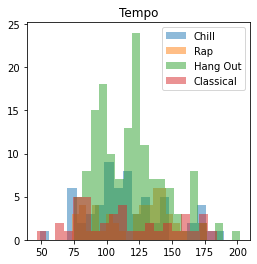

In [67]:
columns = df_chill.columns.drop(["Name", "Album", "Artist", "Release_date", "Length", "Popularity", "Time_signature"])

for i in columns:
    plt.figure(figsize = (4,4))
    plt.hist(df_chill[i],     bins=20, alpha=0.5, label=("Chill")) 
    plt.hist(df_rap[i],       bins=20, alpha=0.5, label=("Rap"))
    plt.hist(df_hOut[i],     bins=20, alpha=0.5, label=("Hang Out"))
    plt.hist(df_classical[i], bins=20, alpha=0.5, label=("Classical"))
    plt.legend(loc='upper right') 
    plt.title(i) 
    plt.show()

# Polar Plot

In [68]:
#Normalize data

def normalize(df):
    for col in df[["Loudness", "Tempo"]]:
        df[col] = ((df[col] - df[col].min()) / (df[col].max() - df[col].min()))
    return df

normalize(df_chill)
normalize(df_rap)
normalize(df_hOut)
normalize(df_classical)

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",Bach: Unaccompanied Cello Suites (Remastered),Johann Sebastian Bach,1983,151480,64,0.257,0.900,0.10900,0.867000,0.0762,0.521130,0.0597,0.205509,4
1,"Horn Concerto No.4 in E flat, K.495: 3. Rondo ...",Mozart in the Morning,Wolfgang Amadeus Mozart,1992-09-15,217000,20,0.360,0.994,0.17200,0.919000,0.1200,0.562537,0.0464,0.120218,4
2,"Köln, January 24, 1975, Pt. II C - Live",The Köln Concert,Keith Jarrett,1975-11-30,416840,40,0.270,0.973,0.68800,0.884000,0.6690,0.686595,0.0547,0.211510,4
3,Take Five,Time Out,The Dave Brubeck Quartet,1959-12-14,324133,66,0.454,0.539,0.26000,0.000780,0.0675,0.788541,0.0401,0.927920,5
4,Singin' The Blues,"Bix Beiderbecke, Volume I: Singin' The Blues",Bix Beiderbecke,1927,180026,39,0.709,0.990,0.20800,0.796000,0.0831,0.819596,0.0828,0.621815,4
5,West End Blues,Ken Burns Jazz-Louis Armstrong,Louis Armstrong,2000-11-03,194466,8,0.586,0.987,0.31300,0.673000,0.1290,0.847278,0.0639,0.278308,4
6,Weather Bird,Louis Armstrong: Portrait Of The Artist As A Y...,Louis Armstrong,1923,161933,36,0.831,0.984,0.26200,0.912000,0.2040,0.814977,0.0942,0.420744,4
7,King Porter Stomp,In Person,Benny Goodman,2014-04-02,255893,19,0.456,0.662,0.35900,0.005670,0.6810,0.779499,0.1080,0.937756,4
8,This Year's Kisses (with Teddy Wilson & His Or...,A Musical Romance,Billie Holiday,1937,187560,42,0.711,0.918,0.14800,0.000012,0.1150,0.746085,0.0474,0.456151,4
9,Honeysuckle Rose,The Essential Fats Waller,Fats Waller,2014-03-10,157826,33,0.731,0.916,0.18900,0.005340,0.1260,0.699306,0.0642,0.785572,4


In [69]:
def polar_points(df):
    df = df[['Danceability', 'Acousticness', 'Energy', 'Instrumentalness', 
             'Liveness', 'Loudness', 'Speechiness', 'Tempo']].mean()
    return df

polar_pointsCh = polar_points(df_chill)
polar_pointsR = polar_points(df_rap)
polar_pointsDR = polar_points(df_hOut)
polar_pointsCl = polar_points(df_classical)

In [70]:
import plotly.graph_objects as go

categories = ['Danceability', 'Acousticness', 'Energy', 'Instrumentalness', 
              'Liveness', 'Loudness', 'Speechiness', 'Tempo']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=polar_pointsCh,
      theta=categories,
      #fill='toself',
      name='Chill'))

fig.add_trace(go.Scatterpolar(
      r=polar_pointsR,
      theta=categories,
      #fill='toself',
      name='Rap'))

fig.add_trace(go.Scatterpolar(
      r=polar_pointsDR,
      theta=categories,
      #fill='toself',
      name='Hang Out'))

fig.add_trace(go.Scatterpolar(
      r=polar_pointsCl,
      theta=categories,
      #fill='toself',
      name='Classical'))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 1])), showlegend=True)

fig.show()

# Concatenating the tables

In [71]:
#Create new column for genre
df_chill["Playlist"]     = "Chill"
df_rap["Playlist"]       = "Rap"
df_hOut["Playlist"]      = "Hang Out"
df_classical["Playlist"] = "Classical"

In [72]:
#Concatenate tables
df_all = df_chill.merge(df_rap, how = "outer").merge(df_hOut, how = "outer").merge(df_classical, how = "outer")
df_all.tail(3)

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Playlist
297,Jazz Suite No. 2: VI. Waltz 2,Shostakovich: Jazz Suites Nos. 1 - 2 / The Bol...,Dmitri Shostakovich,2002-04-15,193600,57,0.322,0.984,0.18400,0.902,0.0813,0.620848,0.0338,0.444322,4,Classical
298,"Nocturne, Op. posth. in C-Sharp Minor: Lento",Chopin: Complete Nocturnes,Frédéric Chopin,2010-06-22,239973,61,0.272,0.992,0.00397,0.900,0.0763,0.185514,0.0475,0.183968,4,Classical
299,Caravan,Jazz Profile: Duke Ellington,Duke Ellington,1997-01-01,254906,32,0.434,0.867,0.60000,0.451,0.1110,0.867457,0.0286,0.434602,4,Classical


# Cleaning the data

In [73]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              300 non-null    object 
 1   Album             300 non-null    object 
 2   Artist            300 non-null    object 
 3   Release_date      300 non-null    object 
 4   Length            300 non-null    int64  
 5   Popularity        300 non-null    int64  
 6   Danceability      300 non-null    float64
 7   Acousticness      300 non-null    float64
 8   Energy            300 non-null    float64
 9   Instrumentalness  300 non-null    float64
 10  Liveness          300 non-null    float64
 11  Loudness          300 non-null    float64
 12  Speechiness       300 non-null    float64
 13  Tempo             300 non-null    float64
 14  Time_signature    300 non-null    int64  
 15  Playlist          300 non-null    object 
dtypes: float64(8), int64(3), object(5)
memory us

In [74]:
# convert release_date to datetime object
df_all['Release_date'] = pd.to_datetime(df_all['Release_date'])

### Converting the length to minutes

In [75]:
#Convert milliseconds to minutes
def msToMin(ms):
    decimalMins = ms / 1000 / 60                                  #get number in decimal minutes
    mins = math.floor(decimalMins)                                #separate minutes from the decimal
    decimalSecs = decimalMins - mins                              #get the seconds (as a decimal)
    secs = decimalSecs * 60 / 100                                 #get seconds in time
    finalTime = mins + secs                                       #final time in minutes and seconds
    formattedFinalTime = float("{:.2f}".format(finalTime))        #format to 2 decimal places
    return formattedFinalTime

#Crate a series storing the new time
newLength = []
for i in df_all["Length"]:
    newLength += [msToMin(i)]    
newTime = pd.Series(newLength, dtype = float)


#Apply to the dataframe
df_all["Length"] = newTime

# Machine Learning

### KNN

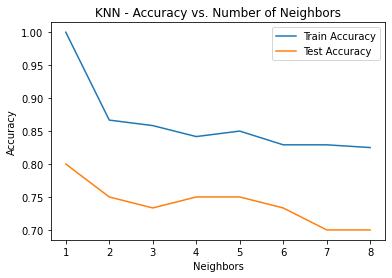

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y = df_all["Playlist"]
X = df_all.drop(["Name", "Album", "Artist", "Release_date", "Length", 
                 "Popularity", "Time_signature", "Playlist"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i]  = knn.score(X_test, y_test)
    
plt.figure()
plt.title("KNN - Accuracy vs. Number of Neighbors")
plt.plot(neighbors, train_accuracy, label = "Train Accuracy")
plt.plot(neighbors, test_accuracy, label = "Test Accuracy")
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()



In [79]:
high = test_accuracy[0]
best_neighbors = 0
for i in range(len(test_accuracy)):
    if (high <= test_accuracy[i]):
        high = test_accuracy[i]
        best_neighbors = i + 1
accuracyHO = ("%.2f" % (high * 100))
print ("Location: ", best_neighbors, "\nAccuracy: ", accuracyHO)

Location:  1 
Accuracy:  80.00


### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

forestModel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
forestModel.fit(X_train, y_train)
predictions = forestModel.predict(X_test)

results = np.array(y_test)
score = 0
for i in range(len(predictions)):
    if (predictions[i] == results[i]):
        score = score + 1

accuracy = score / len(predictions)

accuracyBC = ("%.2f" % (accuracy * 100))
print ("Accuracy: ", accuracyBC)

Accuracy:  76.67


### Accuracy

In [81]:
#Accuracy KNN
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[['Chill' 11]
 ['Classical' 8]
 ['Hang Out' 30]
 ['Rap' 11]]


In [82]:
knn2 = KNeighborsClassifier(n_neighbors = best_neighbors)
knn2.fit(X_train, y_train)
knnPredictor = knn2.predict(X_test)

knnResults = np.array(y_test)

def knnEvaluator(genre):
    scoreKNN = 0
    if (genre == "Chill"): genNum = 0
    if (genre == "Classical"): genNum = 1
    if (genre == "Hang Out"): genNum = 2
    if (genre == "Rap"): genNum = 3
    for i in range(len(knnPredictor)):
        if ((knnPredictor[i] == knnResults[i]) and (genre == knnResults[i])):
            scoreKNN = scoreKNN + 1
    overall = scoreKNN / frequencies[genNum][1]   
    return ("%.2f" % (overall * 100))

In [83]:
#Accuracy RF
def RFEvaluator(genre):
    scoreRF = 0
    if (genre == "Chill"): genNum = 0
    if (genre == "Classical"): genNum = 1
    if (genre == "Hang Out"): genNum = 2
    if (genre == "Rap"): genNum = 3
    for i in range(len(predictions)):
        if ((predictions[i] == results[i]) and (genre == results[i])):
            scoreRF = scoreRF + 1
    overall = scoreRF / frequencies[genNum][1]   
    return ("%.2f" % (overall * 100))

In [84]:
playlist = ["Classical", "Hang Out", "Chill", "Rap", "Overall"]
data = {"KNN": [knnEvaluator("Classical"), knnEvaluator("Hang Out"), knnEvaluator("Chill"), knnEvaluator("Rap"), accuracyHO],
        "Random Forest": [RFEvaluator("Classical"), RFEvaluator("Hang Out"), RFEvaluator("Chill"), RFEvaluator("Rap"), accuracyBC]}
pd.DataFrame(data=data, index=playlist)

,KNN,Random Forest
Classical,87.50,87.50
Hang Out,76.67,83.33
Chill,81.82,54.55
Rap,81.82,72.73
Overall,80.00,76.67


# Working with liked songs

In [86]:
tracks_liked_songs = get_playlist_track_id('mgbreslau', 'spotify:playlist:6ykTgWUs4AroLQsr7e0RTA')
songs_liked = get_songs(tracks_liked_songs)

df_liked_songs = pd.DataFrame(songs_liked, columns = ["Name", "Album", "Artist", "Release_date", "Length", "Popularity", "Danceability", 
                                                      "Acousticness", "Energy", "Instrumentalness", "Liveness", 
                                                      "Loudness", "Speechiness", "Tempo", "Time_signature"])
normalize(df_liked_songs)

df_liked_songs.head(3)

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature
0,Closing Time,20th Century Masters: The Millennium Collectio...,Semisonic,2003-01-01,274160,66,0.478,0.0204,0.854,0.000001,0.1150,0.894494,0.0289,0.243645,4
1,Sunny Afternoon - Stereo Version,Face to Face (Deluxe Edition),The Kinks,1966-10-28,214693,37,0.555,0.1290,0.553,0.000000,0.0687,0.860638,0.0244,0.000000,4
2,Play Hard (feat. Ne-Yo & Akon),Nothing but the Beat 2.0,David Guetta,2011-08-26,201000,58,0.691,0.1740,0.921,0.000000,0.3310,1.000000,0.0535,0.555529,4


In [88]:
X_LS = df_liked_songs.drop(["Name", "Album", "Artist", "Release_date", "Length", 
                            "Popularity", "Time_signature"], axis = 1)

predict_LS = knn2.predict(X_LS)

df_LS_Playlist = pd.DataFrame(predict_LS, columns = ["Playlist"])
df_liked_songs = df_liked_songs.join(df_LS_Playlist, how='inner')
df_liked_songs

,Name,Album,Artist,Release_date,Length,Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Playlist
0,Closing Time,20th Century Masters: The Millennium Collectio...,Semisonic,2003-01-01,274160,66,0.478,0.0204,0.854,0.000001,0.1150,0.894494,0.0289,0.243645,4,Hang Out
1,Sunny Afternoon - Stereo Version,Face to Face (Deluxe Edition),The Kinks,1966-10-28,214693,37,0.555,0.1290,0.553,0.000000,0.0687,0.860638,0.0244,0.000000,4,Hang Out
2,Play Hard (feat. Ne-Yo & Akon),Nothing but the Beat 2.0,David Guetta,2011-08-26,201000,58,0.691,0.1740,0.921,0.000000,0.3310,1.000000,0.0535,0.555529,4,Hang Out
3,Only Time,A Day Without Rain,Enya,2000-11-11,218546,70,0.418,0.8410,0.249,0.661000,0.1120,0.661380,0.0301,0.169783,4,Classical
4,The Monster,The Marshall Mathers LP2,Eminem,2013-11-05,250188,74,0.781,0.0525,0.853,0.000000,0.1200,0.944379,0.0715,0.392128,4,Hang Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Moonwalking in Calabasas (feat. Blueface) - Remix,Moonwalking in Calabasas (feat. Blueface) [Remix],DDG,2020-12-02,170232,82,0.928,0.0614,0.341,0.000000,0.1620,0.761150,0.1030,0.554664,4,Chill
96,Tyler Herro,Tyler Herro,Jack Harlow,2020-10-22,156497,84,0.794,0.1100,0.756,0.000000,0.2470,0.846522,0.1360,0.498356,4,Hang Out
97,Kacey Talk,Top,YoungBoy Never Broke Again,2020-09-11,151248,79,0.877,0.5350,0.607,0.000000,0.1380,0.828019,0.1500,0.530909,4,Hang Out
98,Losses,Losses,Lil Tjay,2020-10-30,195648,77,0.848,0.1530,0.457,0.000000,0.1150,0.763343,0.2930,0.310269,4,Hang Out


In [90]:
df_new_chill = df_liked_songs[df_liked_songs["Playlist"] == "Chill"]
df_new_chill.drop(["Album", "Artist", "Release_date", "Length", "Popularity", 
                   "Danceability", "Acousticness", "Energy", "Instrumentalness", 
                   "Liveness", "Loudness", "Speechiness", "Tempo", "Time_signature"], axis = 1)

,Name,Playlist
5,Joker And The Thief,Chill
14,Wishing Well,Chill
15,Reminds Me Of You,Chill
20,Guilty Pleasure,Chill
22,Chosen (feat. Ty Dolla $ign),Chill
27,Easy (LIke Sunday Morning),Chill
28,She's Got a Way,Chill
29,Somewhere Over The Rainbow_What A Wonderful World,Chill
36,The City (with Quinn XCII),Chill
44,Caravan,Chill


In [91]:
df_new_rap = df_liked_songs[df_liked_songs["Playlist"] == "Rap"]
df_new_rap.drop(["Album", "Artist", "Release_date", "Length", "Popularity", 
                   "Danceability", "Acousticness", "Energy", "Instrumentalness", 
                   "Liveness", "Loudness", "Speechiness", "Tempo", "Time_signature"], axis = 1)

,Name,Playlist
10,BLIND (feat. Young Thug),Rap
11,Ms. Jackson,Rap
24,Big Decisions,Rap
25,Trust,Rap
38,Masterpiece,Rap
39,Runnin,Rap
40,Errbody,Rap
42,No One,Rap
43,Flood My Wrist (feat. Lil Uzi Vert),Rap


In [92]:
df_new_hOut = df_liked_songs[df_liked_songs["Playlist"] == "Hang Out"]
df_new_hOut.drop(["Album", "Artist", "Release_date", "Length", "Popularity", 
                  "Danceability", "Acousticness", "Energy", "Instrumentalness", 
                  "Liveness", "Loudness", "Speechiness", "Tempo", "Time_signature"], axis = 1)

,Name,Playlist
0,Closing Time,Hang Out
1,Sunny Afternoon - Stereo Version,Hang Out
2,Play Hard (feat. Ne-Yo & Akon),Hang Out
4,The Monster,Hang Out
6,Saturday Sun,Hang Out
9,Spicy (feat. Post Malone),Hang Out
12,Marvelous Day (feat. Lil Uzi Vert & Gunna),Hang Out
13,Levitating (feat. DaBaby),Hang Out
21,Dive,Hang Out
23,Female Goat,Hang Out


In [93]:
df_new_classical = df_liked_songs[df_liked_songs["Playlist"] == "Classical"]
df_new_classical.drop(["Album", "Artist", "Release_date", "Length", "Popularity", 
                   "Danceability", "Acousticness", "Energy", "Instrumentalness", 
                   "Liveness", "Loudness", "Speechiness", "Tempo", "Time_signature"], axis = 1)

,Name,Playlist
3,Only Time,Classical
7,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",Classical
8,"Für Elise, WoO 59",Classical
16,All The Things You Are,Classical
17,Autumn Leaves,Classical
18,Stardust,Classical
19,Kiss the Rain,Classical
26,Blackbird - Remastered 2009,Classical
34,Loving,Classical
45,"8 Humoresques, Op. 101, B. 187: No. 7. Poco le...",Classical
